In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, ToPILImage
from matplotlib import pyplot as plt

In [ ]:
#загрузка тренировчного и тестового наборов данных.
#Для загрузки используется библиотека фраемворка pytorch
#под названием torchvision. В данном случае мы загружаем
#черно белые изображения одежды из 10 категорий. Подробнее:
#https://github.com/zalandoresearch/fashion-mnist
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#Этот класс копирует поведение встроенного класса Dataset 
#библиотеки pytorch. В данном случае data - имитация какого-то
#набора данных. Волшебные методы __len__ и __getitem__ позволяют
#расширить функционал класса python, делая итеарацию по набору
#данных проще и удобнее.
class test:
  def __init__(self, data):
      self.data = data
  
  def __len__(self,):
      #вызывается в момент len(экземпляр класса test)
      return len(self.data)

  def __getitem__(self, key):
  #   #вызывается в момент экземпляр класса test [index]
      return self.data[key]

a = [1,2,3,4,5]
check = test(a)
check[2]

3

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
#каждый элемент данных, содержащийся training_data (аналогично для test_data)
#представляет из себя кортеж (tuple). Перывый элемент кортежа - изображение, 
#второй - метка класса. Далее мы нарисуем изображение, чтобы убедиться, что 
#метка класса и изображение совпадают.
image, label = test_data[5]
label

1

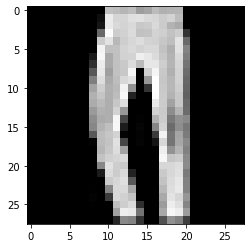

In [ ]:
# 1 - соответсует метке брюк
image = ToPILImage(mode='L')(image)
plt.imshow(image, cmap = 'gray')

In [ ]:
#batch_size - размер пакета, показывает какого количество данных за раз будет
#подаваться нейронной сети на вход. Если batch_size = 64, то за раз нейросеть
#будет получать 64 изображения. Этот параметр задается в самом начале и не меняется
#на всем этапе обучения. Является гиперпараметром. Влияет на точность.
batch_size = 64

#Создание экземпляра класса DataLoader, который будет автоматически собирать 
#данные в пакет нужного нам размера. По сути расширение Dataset. Далее мы будем
#использовать именно DataLoader. Можно посмотреть какого размера данные (тензоры)
#на выходе DataLoader.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
#выбор устройства для обучения. Чтобы поменять на gpu (видеокарту) для увеличения
#скорости нужно перейти в кладку "Среда выполнения" (сверху) и выбрать параметр
#"сменить среду выполнения"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#Создание класса нейронной сети. Он наследуется от nn.Module (класс Pytorch)
#В этом классе вам нужно определять слои нейронной сети. Метод forward - исполь
#зуется для прямого прохода сети (смотри презентацию), т.е. считает предсказание.

#nn.Sequential используется для объединения нескольких блоков нейронной сети в один

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10)
        )
    #предсказание
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
#проверка, что нейронная сеть работает
for X, y in test_dataloader:
    X = X.to(device)
    y_pred = model(X)
    print(y_pred.shape)
    break

torch.Size([64, 10])


In [ ]:
#выбор функции потерь, которой мы будем считать ошибку предсказания. Для клас-
#сификации обычно используется CrossEntropyLoss, но можно использовать и MSE.
loss_fn = nn.CrossEntropyLoss()
#Выбор оптимайзера. Он занимается обновлением параметров. Сейчас не вижу смысла
#дотошно разбирать как он работает. Он, в отличии от нас на лекции, более хитро
#обновляет веса модели, а раз он обновляет веса именно ему нужно передать параметр
#скорости обучения lr!
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    #перевод модели в режим тренировки. Это нужно указывать, так как некоторые
    #слои сети по-разному считаются на тренировке и на тесте.
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        #извлекаем данные из dataloader и ФИЗИЧЕСКИ перекладываем их на то же
        #устройство, на котором находится модель. 
        X, y = X.to(device), y.to(device)

        #делаем предсказание
        pred = model(X)
        #считаем ошибку
        loss = loss_fn(pred, y)

        #зануляем градиенты с предыдущего шага
        optimizer.zero_grad()
        
        #считаем градиенты
        loss.backward()
        #обновляем веса модели
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    #для предсказания на тестовых данных всегда используейте with torch.no_grad()
    #чтобы pytorch не считал градиенты.
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
#собираем все вместе. Каждая эпоха состоит из 2х циклов - обучения и теста. 
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.318158  [   64/60000]
loss: 0.764904  [ 6464/60000]
loss: 0.511100  [12864/60000]
loss: 0.639361  [19264/60000]
loss: 0.447976  [25664/60000]
loss: 0.411134  [32064/60000]
loss: 0.451711  [38464/60000]
loss: 0.556624  [44864/60000]
loss: 0.601236  [51264/60000]
loss: 0.555799  [57664/60000]
Test Error: 
 Accuracy: 82.2%, Avg loss: 0.475519 

Epoch 2
-------------------------------
loss: 0.343028  [   64/60000]
loss: 0.381232  [ 6464/60000]
loss: 0.336862  [12864/60000]
loss: 0.456450  [19264/60000]
loss: 0.441384  [25664/60000]
loss: 0.359140  [32064/60000]
loss: 0.270243  [38464/60000]
loss: 0.468020  [44864/60000]
loss: 0.448025  [51264/60000]
loss: 0.465190  [57664/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.404435 

Epoch 3
-------------------------------
loss: 0.250024  [   64/60000]
loss: 0.294638  [ 6464/60000]
loss: 0.256159  [12864/60000]
loss: 0.348070  [19264/60000]
loss: 0.387079  [25664/60000]
loss: 0.340879  [32064/600

In [ ]:
img, label = test_data[5]
y = model(img)

In [ ]:
torch.save(model.state_dict(), 'model.pt')

In [ ]:
torch.argmax(y)

tensor(1)

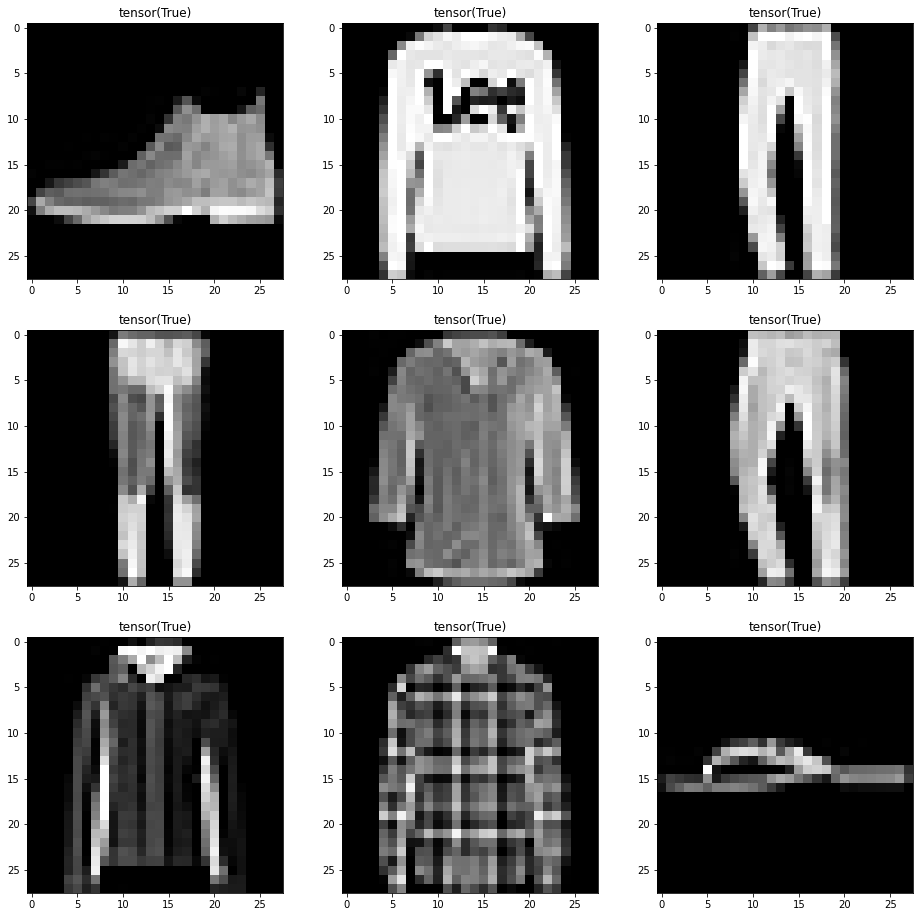

In [ ]:
#Для визуализации результатов
def plot(model, testdataset, imgs = 9):
  fig = plt.figure(figsize=(16,16))
  for i in range(imgs):
      a = fig.add_subplot(3, 3, i + 1)
      image, label = testdataset[i]
      predict = torch.argmax(model(image))
      image = ToPILImage(mode='L')(image)
      plt.imshow(image, cmap = 'gray')
      a.set_title(str(predict == label))
  plt.show()
plot(model, test_data)

### Метрики ###

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predicts = []
real_labels = []
model.eval()
with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to(device)
        pred = model(X)
        predicts.extend(pred.argmax(1).tolist())
        real_labels.extend(y.tolist())

In [ ]:
predicts[:5], real_labels[:5]

([9, 2, 1, 1, 6], [9, 2, 1, 1, 6])

In [ ]:
precision_score(predicts, real_labels, average=None)

array([0.857, 0.973, 0.71 , 0.844, 0.891, 0.933, 0.601, 0.975, 0.983,
       0.949])

In [ ]:
recall_score(predicts, real_labels, average=None)

array([0.81386515, 0.96051333, 0.83040936, 0.89596603, 0.67346939,
       0.98314015, 0.77051282, 0.91463415, 0.95808967, 0.95568983])

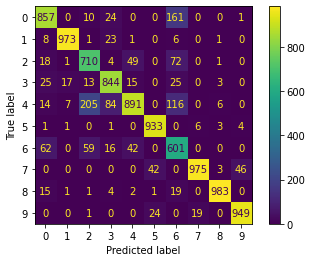

In [ ]:
cm = confusion_matrix(predicts, real_labels, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()